In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
from auxPlots import interpolateData, getContours
from nloSbottomXsec import xsecF
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Load Recast Data

In [2]:
files = {'CMS-EXO-20-004' :'../results_dataFrames/pp2BB1j_cms_latest.pcl',}


recastDataDict = {label : pd.read_pickle(f) for label,f in files.items()}

msb = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'

In [3]:
for label,df in recastDataDict.items():
    kfactors = []
    for irow,row in df.iterrows():
        mLLP = row['mLLP']
        xsec = row['Total xsec (pb)']
        k = xsecF(mLLP)/xsec
        kfactors.append(k)
    df['kfactor'] = kfactors

### Add Error estimate from single bin error

In [4]:
binLabel = 'bin_590.0_640.0'
for label,df in recastDataDict.items():
    nPreSel = df[binLabel]
    nPreSelErr = df[binLabel+'_ErrorPlus']
    df['robsErr'] = df['robs']*(nPreSelErr/nPreSel)

### Plot luminosity for each sample

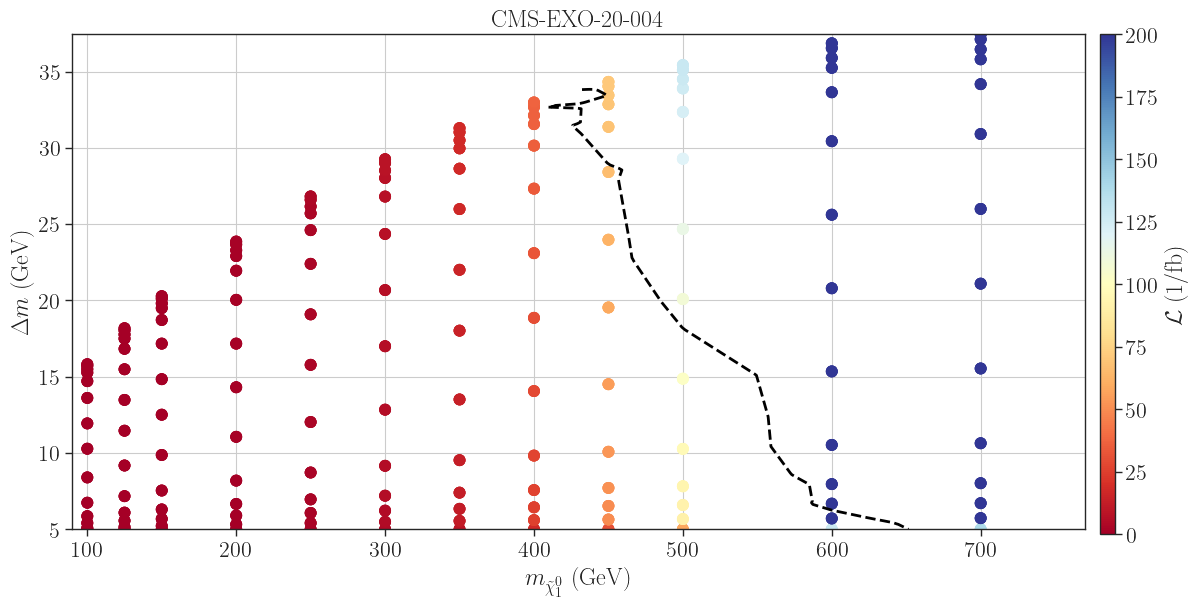

In [5]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(15,5))
axarr = [axarr]

for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    mcEvents = recastData['Total MC Events']
    xsec = recastData['Total xsec (pb)']
    lumi = mcEvents/(1e3*xsec)
    
    rValues = recastData['robs']*recastData['kfactor']
    # Interpolate to create more points
    xnew,ynew,znew = interpolateData(x,y,rValues,nx=300,ny=300)
    cValues = sorted([1.])
    # Get contours
    contours = ax.contour(xnew, ynew, znew, cValues, colors='black',linestyles=['dashed','solid'],linewidths=2.0)    

    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=200.0,
            c=lumi,cmap=cm,s=60)


    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)
    ax.set_xlim(0.9*x.min(),1.1*x.max())
    ax.grid()

fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$\mathcal{L}$ (1/fb)',cax=cbar_ax)
# plt.tight_layout()
plt.show()

### Number of MC events for given luminosity

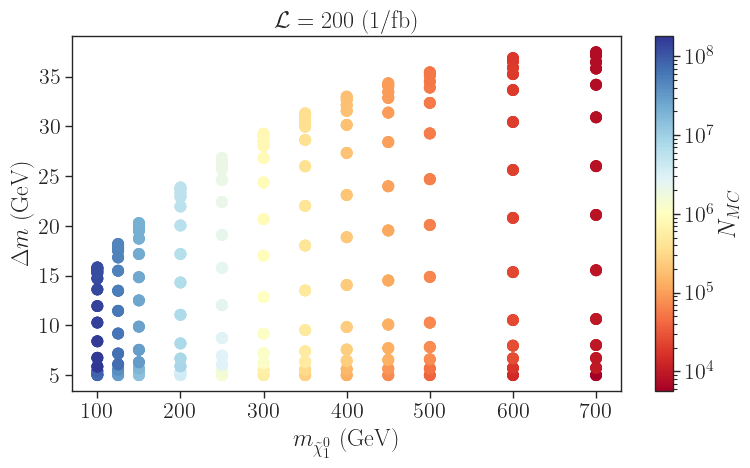

In [6]:
lumi = 200.0
fig = plt.figure(figsize=(8,5))

recastData = recastDataDict['CMS-EXO-20-004']
recastData = recastDataDict[label]
y = recastData[msb]-recastData[mn1]
x = recastData[mn1]    
xsec = recastData['Total xsec (pb)']
mcEvents = xsec*lumi*1e3
p = plt.scatter(x=x,y=y,
        c=mcEvents,cmap=cm,s=60,norm=LogNorm())

plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.ylabel(r'$\Delta m$ (GeV)')
plt.title(r'$\mathcal{L} = %1.0f$ (1/fb)' %lumi)
plt.colorbar(label=r'$N_{MC}$')

plt.tight_layout()
plt.show()

### Plot MC error for each analysis

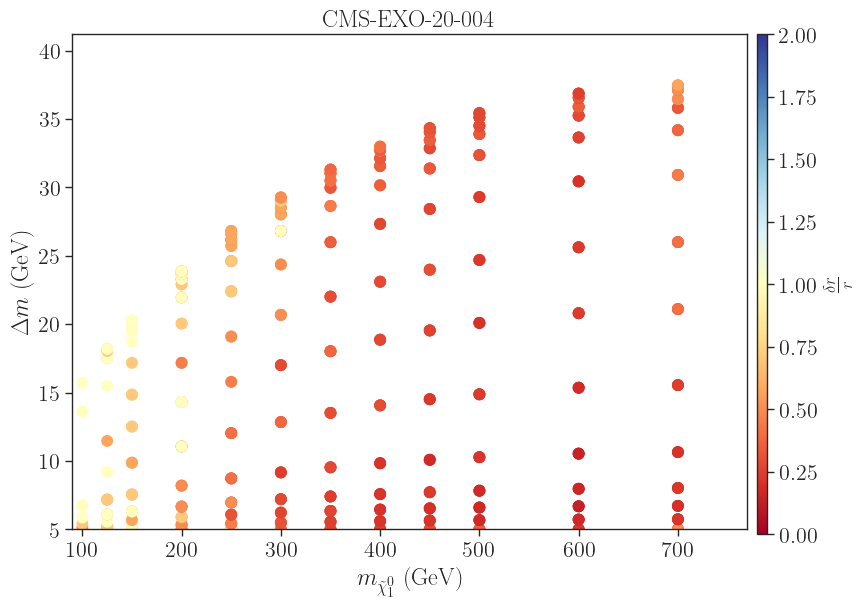

In [11]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(10,5))
axarr = [axarr]

for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    rValues = recastData['robs']*recastData['kfactor']
    rValuesErr = recastData['robsErr']*recastData['kfactor']
    ratio = rValuesErr/rValues
    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=2.0,
            c=ratio,cmap=cm,s=60)
    
    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)
    ax.set_xlim(0.9*x.min(),1.1*x.max())
    ax.set_ylim(5.0,1.1*y.max())


fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$\frac{\delta r}{r}$',cax=cbar_ax)
# plt.tight_layout()
plt.show()

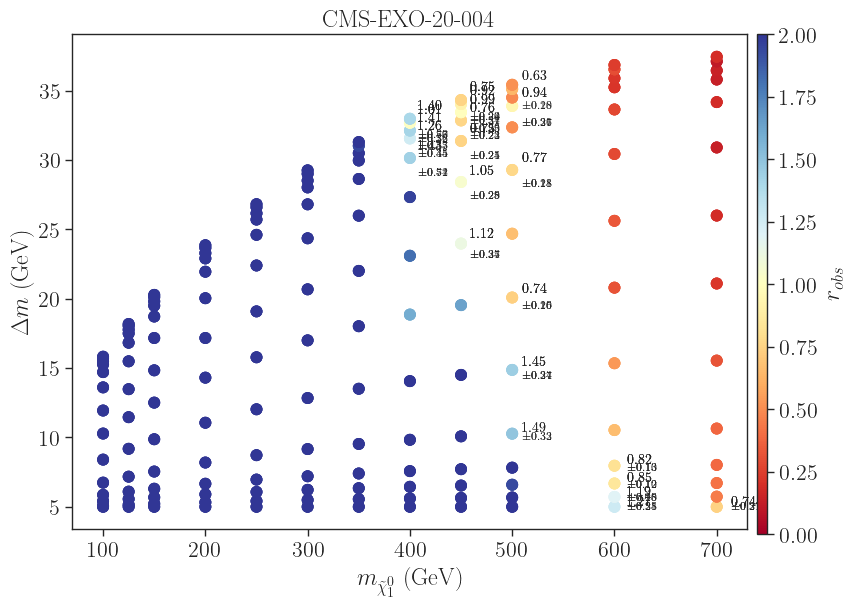

In [18]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(10,5))
axarr=[axarr]

low_stats = []
for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    mcEvents = recastData['Total MC Events']/1e3
    tau = recastData['tau_ns']
    rValues = recastData['robs']*recastData['kfactor']
    rValuesErr = recastData['robsErr']*recastData['kfactor']
    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=2.0,
            c=rValues,cmap=cm,s=60)
    
    for i,pt in enumerate(x):
        # plt.text(1.05*x[i],1.05*y[i],r'$%1.1e \pm %1.1e$' %(rValues[i],rValuesErr[i]),fontsize=5)
        if not rValues[i]:
            continue
        if rValues[i]+2*rValuesErr[i] < 1.0:
            continue
        if rValues[i]-2*rValuesErr[i] > 1.0:
            continue
        if rValues[i] > 1.5:
            continue
        ax.text(1.02*x[i],1.02*y[i],r'$%1.2f$' %(rValues[i]),fontsize=10)
        ax.text(1.02*x[i],0.96*y[i],r'$\pm %1.2f$' %(rValuesErr[i]),fontsize=8)
        low_stats.append([x[i],x[i]+y[i],tau[i],mcEvents[i]])


    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)
    # ax.set_xlim(300.0,700.)
    # ax.set_ylim(5.0,1.1*y.max())


fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$r_{obs}$',cax=cbar_ax)
# plt.tight_layout()
plt.show()

In [19]:
print(len(low_stats))

67


In [20]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2], "100000") for pt in low_stats if pt[1]-pt[0] > 5.75]
# ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in sorted(low_stats) if pt[0] > 0.0]
print(str(ptsIni).replace("'", ""))

[(400.00, 430.15, 3.11e-02, 100000), (400.00, 430.15, 3.11e-02, 100000), (400.00, 430.15, 3.11e-02, 100000), (400.00, 431.56, 1.76e-02, 100000), (400.00, 431.56, 1.76e-02, 100000), (400.00, 431.56, 1.76e-02, 100000), (400.00, 432.13, 1.18e-02, 100000), (400.00, 432.13, 1.18e-02, 100000), (400.00, 432.13, 1.18e-02, 100000), (400.00, 432.69, 5.67e-03, 100000), (400.00, 432.69, 5.67e-03, 100000), (400.00, 432.69, 5.67e-03, 100000), (400.00, 432.98, 2.44e-03, 100000), (400.00, 432.98, 2.44e-03, 100000), (400.00, 432.98, 2.44e-03, 100000), (450.00, 473.98, 8.46e-02, 100000), (450.00, 473.98, 8.46e-02, 100000), (450.00, 473.98, 8.46e-02, 100000), (450.00, 478.42, 5.00e-02, 100000), (450.00, 478.42, 5.00e-02, 100000), (450.00, 478.42, 5.00e-02, 100000), (450.00, 481.38, 2.85e-02, 100000), (450.00, 481.38, 2.85e-02, 100000), (450.00, 481.38, 2.85e-02, 100000), (450.00, 482.86, 1.64e-02, 100000), (450.00, 482.86, 1.64e-02, 100000), (450.00, 482.86, 1.64e-02, 100000), (450.00, 483.45, 1.10e-02, 